In [1]:
import numpy as np
import matplotlib.pyplot as plt

iter:0,loss:87.94726762792936
iter:20,loss:39.00290638352118
iter:40,loss:20.068833742000372
iter:60,loss:11.566488421318232
iter:80,loss:7.7395363838971125
iter:100,loss:6.085797079544049
iter:120,loss:5.400408375430163
iter:140,loss:5.123514746785168
iter:160,loss:5.011329056320356
iter:180,loss:4.963483817950339
iter:200,loss:4.940290292680953
iter:220,loss:4.926469747370751
iter:240,loss:4.916240218044652
iter:260,loss:4.907436288330109
iter:280,loss:4.899251382228967
iter:300,loss:4.891385207323129
iter:320,loss:4.883725128040201
iter:340,loss:4.876227854256725
iter:360,loss:4.868875690330759
iter:380,loss:4.861660398969567
iter:400,loss:4.854577260106696
iter:420,loss:4.847622885618628
iter:440,loss:4.840794415625093
iter:460,loss:4.834089222441401
iter:480,loss:4.827504800907729
iter:500,loss:4.821038727108078
iter:520,loss:4.814688642186853
iter:540,loss:4.808452245391381
iter:560,loss:4.802327290525901
iter:580,loss:4.796311583688095
iter:600,loss:4.79040298150858
iter:620,los

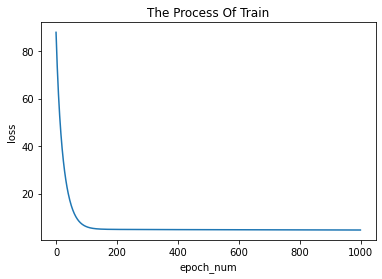

In [10]:
def deal_data():
    #读取文件数据，此时数据形状是(7084,)，即所有数据在一行中
    housingdata = np.fromfile('dublinDataType.data',sep=' ')

    #修改数据格式，将每一条房屋数据放在一行中。
    housingdata = np.array(housingdata).reshape((-1,7))#此时数据形状为(506,14)

    #对数据的前13个属性进行归一化操作，有助于提高模型精准度，这里使用max-min归一化方式。公式为(x-min)/(max-min)
    for i in range(6):
        Max =  np.max(housingdata[:,i])
        Min = np.min(housingdata[:,i])
        housingdata[:,i]=(housingdata[:,i]-Min)/(Max-Min)

    #依据2-8原则，80%的数据作为训练数据，20%数据作为测试数据；此时训练数据是405条，测试数据是101条
    Splitdata = round(len(housingdata)*0.8)
    Train = housingdata[:Splitdata]
    Test = housingdata[Splitdata:]
    return Train,Test

#模型设计以及配置
#首先确定有13个权值参数w，并随机初始化
class Model_Config(object):
    def __init__(self,firstnetnum,secondnetnum):
        np.random.seed(1)
        self.w0 = np.random.randn(firstnetnum*secondnetnum,1).reshape(firstnetnum,secondnetnum)
        self.w1 = np.random.randn(secondnetnum,1)
        self.b0 = np.random.randn(firstnetnum,1).reshape(1,firstnetnum)
        self.b1 = np.random.randn(1,1)
  
    def forward(self,x):
        hidden1 = np.dot(x,self.w0)+self.b0
        y = np.dot(hidden1,self.w1)+self.b1
        return hidden1,y
    
    def loss(self,z,y):
        error = z-y
        cost = error*error
        avg_cost = np.mean(cost)
        return avg_cost
    
    def back(self,x,y):
        hidden1,z = self.forward(x)
        gradient_w1 = (z-y)*hidden1
        gradient_w1 = np.mean(gradient_w1,axis=0)
        gradient_w1 = gradient_w1[:,np.newaxis]
        gradient_b1 = (z-y)
        gradient_b1 = np.mean(gradient_b1)
        gradient_w0 = np.zeros(shape=(6,6))
        for i in range(len(x)):
            data = x[i,:]
            data = data[:,np.newaxis]
            print("data.shape",data.shape)
            w1 = self.w1.reshape(1,6)
            print("self.w1.shape",w1.shape)
            gradient_w01 = (z-y)[i]*np.dot(data,w1)
            print("gradient_w01.shape:",gradient_w01.shape)
            gradient_w0+=gradient_w01
        gradient_w0 = gradient_w0/len(x)
        w2 = self.w1.reshape(1,6)
        gradient_b0 =np.mean((z-y)*w2,axis=0)

        return gradient_w1,gradient_b1,gradient_w0,gradient_b0

    def update(self,gradient_w1,gradient_b1,gradient_w0,gradient_b0,learning_rate):
        self.w1 = self.w1-learning_rate*gradient_w1
        self.b1 = self.b1-learning_rate*gradient_b1
        self.w0 = self.w0-learning_rate*gradient_w0
        self.b0 = self.b0-learning_rate*gradient_b0

    #开始训练
    def train(self,epoch_num,x,y,learning_rate):
        
        losses=[]
        for i in range(epoch_num):
            _,z = self.forward(x)
            avg_loss = self.loss(z,y)
            gradient_w1,gradient_b1,gradient_w0,gradient_b0 = self.back(x,y)
            self.update(gradient_w1,gradient_b1,gradient_w0,gradient_b0,learning_rate)
            losses.append(avg_loss)
            if(i%20==0):
                print("iter:{},loss:{}".format(i,avg_loss))

        return losses
def showpeocess(loss,epoch_num):
    plt.title("The Process Of Train")
    plt.plot([i for i in range(epoch_num)],loss)
    plt.xlabel("epoch_num")
    plt.ylabel("loss")
    plt.show()
if __name__ == '__main__':
    Train,Test = deal_data()
    np.random.shuffle(Train)
    #只获取前13个属性的数据
    x = Train[:,:-1]
    y = Train[:,-1:]
    epoch_num = 1000#设置迭代次数
    Model = Model_Config(6,6)
    losses = Model.train(epoch_num=epoch_num,x=x,y=y,learning_rate=0.001)
    showpeocess(loss=losses,epoch_num=epoch_num)
